In [1]:
# Import Data from CSV file 
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('book.csv')
dataset

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
!pip install mlxtend

In [4]:
# with minimum support 0.005
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(dataset, min_support=0.005, max_len=5,use_colnames = True)
frequent_itemsets 

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
801,0.0115,"(RefBks, ItalArt, ArtBks, GeogBks, ItalAtlas)"
802,0.0125,"(RefBks, ItalArt, ArtBks, ItalCook, ItalAtlas)"
803,0.0090,"(RefBks, ItalArt, GeogBks, ItalCook, ItalAtlas)"
804,0.0090,"(ItalArt, ArtBks, GeogBks, ItalCook, ItalAtlas)"


In [5]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13914,"(ItalAtlas, GeogBks, ArtBks)","(RefBks, ItalArt)",0.0115,0.0200,0.0115,1.000000,50.000000,0.011270,inf
13915,"(RefBks, ItalArt)","(ItalAtlas, GeogBks, ArtBks)",0.0200,0.0115,0.0115,0.575000,50.000000,0.011270,2.325882
13945,"(RefBks, ItalArt)","(ItalCook, ItalAtlas, ArtBks)",0.0200,0.0130,0.0125,0.625000,48.076923,0.012240,2.632000
13944,"(ItalCook, ItalAtlas, ArtBks)","(RefBks, ItalArt)",0.0130,0.0200,0.0125,0.961538,48.076923,0.012240,25.480000
13487,"(RefBks, DoItYBks, ItalArt)","(ItalAtlas, ArtBks)",0.0110,0.0180,0.0095,0.863636,47.979798,0.009302,7.201333
13502,"(ItalAtlas, ArtBks)","(RefBks, DoItYBks, ItalArt)",0.0180,0.0110,0.0095,0.527778,47.979798,0.009302,2.094353
13494,"(ItalAtlas, DoItYBks, ArtBks)","(RefBks, ItalArt)",0.0100,0.0200,0.0095,0.950000,47.500000,0.009300,19.600000
13495,"(RefBks, ItalArt)","(ItalAtlas, DoItYBks, ArtBks)",0.0200,0.0100,0.0095,0.475000,47.500000,0.009300,1.885714
13906,"(RefBks, GeogBks, ItalArt)","(ItalAtlas, ArtBks)",0.0135,0.0180,0.0115,0.851852,47.325103,0.011257,6.628500
13923,"(ItalAtlas, ArtBks)","(RefBks, GeogBks, ItalArt)",0.0180,0.0135,0.0115,0.638889,47.325103,0.011257,2.731846


Text(0, 0.5, 'lift')

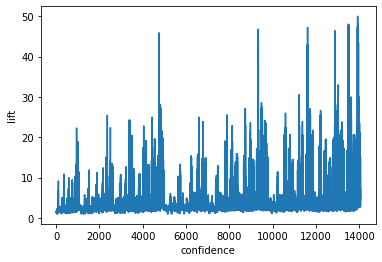

In [17]:
# plot of lift vs confidence
import matplotlib.pyplot as plt
import seaborn as sn
plt.plot(rules.lift)
plt.xlabel('confidence')
plt.ylabel('lift')

In [10]:
# with minimum support 0.5
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets1 = apriori(dataset, min_support=0.1, max_len=5,use_colnames = True)
frequent_itemsets1 

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [11]:
# rules generated for support ratio 0.1
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1.head(20)
rules1.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
82,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
99,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
94,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


Text(0, 0.5, 'lift')

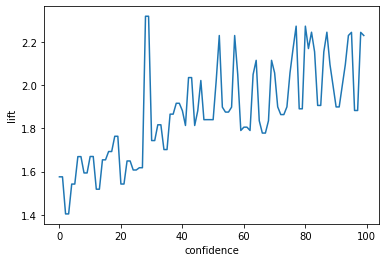

In [15]:
# plot of lift vs confidence
import matplotlib.pyplot as plt
import seaborn as sn
plt.plot(rules1.lift)
plt.xlabel('confidence')
plt.ylabel('lift')